<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
- one feature variable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


0 0.27022506814517017 -0.3464682869568215
10 0.7337618205515551 0.8507776811705247
20 0.7398209166628389 0.8585886335549583
30 0.7398916789633784 0.858642860253215
40 0.7398924655472975 0.8586432676107638
50 0.7398924740804769 0.8586432709454134
60 0.7398924741718806 0.8586432709749654
70 0.7398924741728531 0.8586432709752443
80 0.7398924741728634 0.858643270975247
90 0.7398924741728634 0.858643270975247


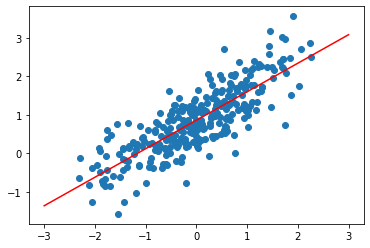

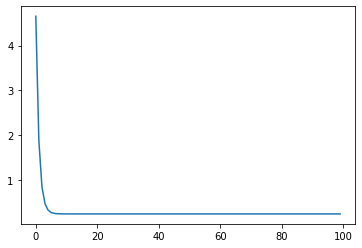

In [37]:
N = 300
np.random.seed(7)
x1 = np.random.randn(N)
y = 0.7 * x1 + 0.9    # w1 = 0.7, b=.9
y = y + np.random.randn(N) * 0.5

plt.scatter(x1, y)
w1, b = np.random.randn(), np.random.randn()
lr = 0.2
n_epoch = 100
lossList = []

for i in range(n_epoch):
    y_pred = w1 * x1 + b
    error = y_pred - y
    loss = (error **2).mean()

    w1 = w1 - lr * (2 * error * x1).mean()
    b = b - lr * (2 * error).mean()

    lossList.append(loss)
    if i % 10 == 0:
        print(i, w1, b)

# plotting
xx = np.linspace(-3, 3, 100)
yy = w1 * xx + b
plt.plot(xx, yy, c='r') 
plt.show()
plt.plot(lossList)

## library function

In [35]:
N = 300
np.random.seed(7)
x1 = np.random.randn(N)
y = 0.7 * x1 + 0.9    # w1 = 0.7, b=0.9
y = y + np.random.randn(N) * 0.5

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x1.reshape(-1,1), y)
print(model.coef_, model.intercept_)

[0.73989247] 0.858643270975247


# Linear Classification
- Logistic Regression classifier
- two features x1, x2

0 -1.1881155936281234 -0.14556319845653515 1.3259370231549463
50 0.020347221260865824 -0.163119761953317 1.3572694200254636
100 0.3497942352684217 -0.3851559920591669 1.3335977652163884
150 0.5157721568479243 -0.49297873752178534 1.318394084390558
200 0.6277394130594581 -0.5653127133508676 1.3062329473765795
250 0.7131784524569278 -0.6204072720909227 1.295704111652771
300 0.7828067418754401 -0.6652565265820084 1.2862204579702488
350 0.8419053607812118 -0.7032853551684232 1.2774762089044644
400 0.8934678648394739 -0.7364303607754219 1.2692896778308709
450 0.939357369170849 -0.7658958930507123 1.2615430465730948


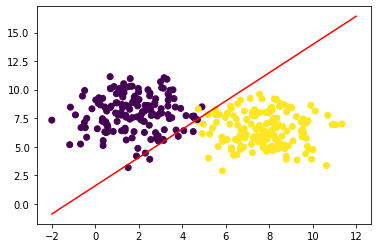

In [71]:
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, 
                    centers=2, cluster_std=1.5,
                    random_state=20)
plt.scatter(X[:,0], X[:,1], c=y)

lr = 0.01
n_epochs = 500
x1, x2 = X[:,0], X[:,1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

lossHistory = []
for i in range(n_epochs):
    logit = w1 * x1 + w2 * x2 + b
    y_pred = sigmoid(logit)

    loss = (-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)).mean()
    w1 = w1 - lr * ((y_pred - y) * x1).mean()
    w2 = w2 - lr * ((y_pred - y) * x2).mean()
    b =   b - lr * (y_pred - y).mean()

    lossHistory.append(loss)
    if i%50 == 0:
        print(i, w1, w2, b)
# plotting
xx = np.linspace(-2, 12, 100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy, c='r') 
plt.show()

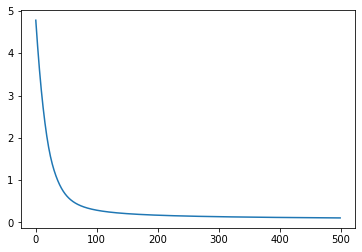

In [72]:
plt.plot(lossHistory)

## Library function

In [64]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [73]:
clf1 = LogisticRegression()
clf1.fit(X, y)
print(clf1.coef_, clf1.intercept_)

[[ 2.70711543 -0.41211706]] [-9.87193992]


In [74]:
clf1 = SGDClassifier()
clf1.fit(X, y)
print(clf1.coef_, clf1.intercept_)

[[110.0693104  -43.77659742]] [-85.54309611]
